In [1]:
from scipy import signal
numtaps = 79
f = 0.2
coeff = signal.firwin(numtaps, f, pass_zero ='lowpass')


(0.0, 0.5430379746835443)

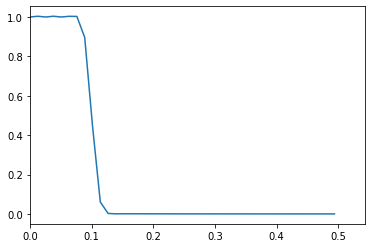

In [2]:
import numpy as np
from scipy import fftpack
fft_coeff = fftpack.fft(coeff)
pow = np.abs(fft_coeff)
freqs = fftpack.fftfreq(len(coeff))
idx = np.argsort(freqs)
import matplotlib.pyplot as plt
plt.plot(freqs[idx], pow[idx])
plt.xlim(left=0)

In [3]:
from scipy.io import wavfile
freq_sample, sig_audio = wavfile.read("welcome.wav")
type(sig_audio)

<ipython-input-3-d7345096e90b>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  freq_sample, sig_audio = wavfile.read("welcome.wav")


numpy.ndarray


Shape of Signal: (645632,)
Signal Datatype: int16
Signal duration: 40.35 seconds


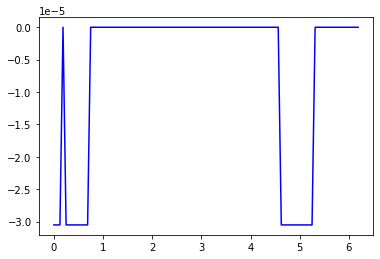

In [4]:
# Output the parameters: Signal Data Type, Sampling Frequency and Duration
print('\nShape of Signal:', sig_audio.shape)
print('Signal Datatype:', sig_audio.dtype)
print('Signal duration:', round(sig_audio.shape[0] / float(freq_sample), 2), 'seconds')

# Normalize the Signal Value and Plot it on a graph
pow_audio_signal = sig_audio / np.power(2, 15)
pow_audio_signal = pow_audio_signal [:100]
time_axis = 1000 * np.arange(0, len(pow_audio_signal), 1) / float(freq_sample)
plt.plot(time_axis, pow_audio_signal, color='blue')

In [5]:
sig_audio 

array([ -1,  -1,  -1, ..., -26, -26, -25], dtype=int16)

In [6]:
N=len(coeff)+len(sig_audio)-1 #lunghezza della convoluzione 
N

645710

In [7]:
audio = [sig_audio[i] if i<len(sig_audio) else 0 for i in range(N)] #DFT 
coeff_1 = [coeff[i] if i<len(coeff) else 0 for i in range(N)]
fft_coeff = fftpack.fft(coeff_1)
fft_audio = fftpack.fft(audio)
out = fft_audio*fft_coeff
freqs = fftpack.fftfreq(N)


(0.0, 0.5499983738830125)

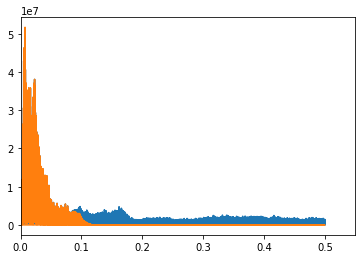

In [8]:
plt.plot(freqs, np.abs(fft_audio))
plt.plot(freqs, np.abs(out))
plt.xlim(left = 0)

In [9]:
coeff

array([-3.84485925e-04, -6.50387459e-04, -7.04565902e-04, -4.86121548e-04,
        8.09736816e-19,  6.43952969e-04,  1.21946042e-03,  1.43311353e-03,
        1.04152227e-03, -1.52839247e-18, -1.43063983e-03, -2.69783283e-03,
       -3.13040598e-03, -2.23482444e-03,  2.67744059e-18,  2.94339762e-03,
        5.43291778e-03,  6.17570556e-03,  4.32491097e-03, -4.07298624e-18,
       -5.50987832e-03, -1.00325936e-02, -1.12750632e-02, -7.82525619e-03,
        5.49168474e-18,  9.86987197e-03,  1.79634636e-02,  2.02517196e-02,
        1.41587248e-02, -6.70648600e-18, -1.84170268e-02, -3.44124782e-02,
       -4.02402805e-02, -2.95934660e-02,  7.52297188e-18,  4.57499126e-02,
        9.97417980e-02,  1.50736329e-01,  1.87157300e-01,  2.00362411e-01,
        1.87157300e-01,  1.50736329e-01,  9.97417980e-02,  4.57499126e-02,
        7.52297188e-18, -2.95934660e-02, -4.02402805e-02, -3.44124782e-02,
       -1.84170268e-02, -6.70648600e-18,  1.41587248e-02,  2.02517196e-02,
        1.79634636e-02,  